In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import parselmouth
import tempfile

In [57]:
def load_from_teanglann(word, dialect):
    valid_dialects = ['C', 'M', 'U']
    if dialect not in valid_dialects and dialect.upper()[0] not in valid_dialects:
        raise Exception(f'Dialect must be one of "C", "M" or "U"; got "{dialect}"')
    url = f'https://www.teanglann.ie/Can{dialect}/{word}.mp3'
    r = requests.get(url)
    if r.status_code != 200:
        raise Exception(f'Failed to fetch {url}')
    file = tempfile.NamedTemporaryFile(mode='w+b')
    file.write(r.content)
    return file

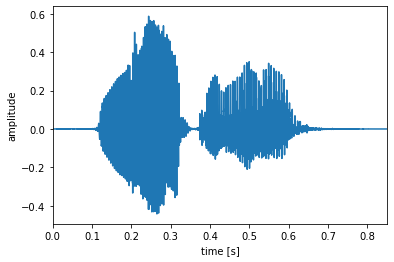

In [59]:
file=load_from_teanglann('madra', 'M')
snd = parselmouth.Sound(file_path=file.name)
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()
file.close()